In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

import pandas as pd

In [2]:
STATION_LINE = ['LA' , 'LB', 'LBA', 'LC', 'LCB', 'RS']

numbers_LA = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O']

numbers_LB = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O', '11', '12', '13', '14', '15', '16']

numbers_LBA = ['O', '1', '2', '3', '4']

numbers_LC = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O', '11', '12']

numbers_LCB = ['1', '2', '3', '4', '5', '6']

numbers_RS = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7']


lon_stations_LA = [-124.7275, -124.8553, -124.9620, -125.0687, \
           -125.1767, -125.2867, -125.3977, -125.5067, -125.6153, -125.7233]
lat_stations_LA = [48.4872, 48.4375, 48.3807, 48.3227, 48.2680, 48.2105, 48.1533, 48.0963, 48.0393, 47.9837]



lon_stations_LB = [-124.9913, -125.0400, -125.0930, -125.1453, -125.2000, -125.2585, -125.3683, \
                  -125.4775, -125.5800, -125.6892, -125.7958, -125.8650, -125.9353, -126.0000, -126.1410, -126.2833]
lat_stations_LB = [48.6733, 48.6500, 48.6220, 48.5945, 48.5667, 48.5363, 48.4780, 48.4217, 48.3667, \
                  48.3095, 48.2533, 48.2153, 48.1767, 48.1413, 48.0727, 48.0088]



lon_stations_LBA = [-124.9667, -125.0633, -125.1300, -125.3467, -125.5000]
lat_stations_LBA = [48.5767, 48.5283, 48.4233, 48.3908, 48.2153]



lon_stations_LC = [-125.4622, -125.5158, -125.5707, -125.6800, -125.7900, -125.9000, -126.0083, -126.1183, \
                  -126.2283, -126.3367, -126.4450, -126.6667]
lat_stations_LC = [48.8407, 48.8113, 48.7825, 48.7238, 48.6657, 48.6077, 48.5493, 48.4908, 48.4323,\
                   48.3733, 48.3158, 48.2500]

lon_stations_LCB = [-125.3667, -125.4508, -125.5000, -125.5917, -125.8300, -126.0633]
lat_stations_LCB = [48.7490, 48.6858, 48.5750, 48.5333, 48.4717, 48.3783]


lon_stations_RS = [-125.2233, -125.3267, -125.4317, -125.5683, -125.7200, -125.9433, -126.1317]
lat_stations_RS = [48.7567, 48.7092, 48.6433, 48.5683, 48.4867, 48.3633, 48.2600]

In [3]:
date_stations_LA = ['Blank','Blank','Blank','23 Aug','Blank','1 Aug', 'Blank','Blank','Blank', 'Blank']

In [4]:
len(lon_stations_LA)

10

### REMEMBER station PLC1 to include this list

In [5]:
LINE_LA_stations  = []
LINE_LB_stations  = []
LINE_LBA_stations = []
LINE_LC_stations  = []
LINE_LCB_stations  = []
LINE_RS_stations  = []

for i in np.arange(len(numbers_LA)):
    value = STATION_LINE[0]+numbers_LA[i]
    LINE_LA_stations = np.append(LINE_LA_stations, value)
    
for i in np.arange(len(numbers_LB)):
    value = STATION_LINE[1]+numbers_LB[i]
    LINE_LB_stations = np.append(LINE_LB_stations, value)
    
for i in np.arange(len(numbers_LBA)):
    value = STATION_LINE[2]+numbers_LBA[i]
    LINE_LBA_stations = np.append(LINE_LBA_stations, value)
    
for i in np.arange(len(numbers_LC)):
    value = STATION_LINE[3]+numbers_LC[i]
    LINE_LC_stations = np.append(LINE_LC_stations, value)

for i in np.arange(len(numbers_LCB)):
    value = STATION_LINE[4]+numbers_LCB[i]
    LINE_LCB_stations = np.append(LINE_LCB_stations, value)
    
for i in np.arange(len(numbers_RS)):
    value = STATION_LINE[5]+numbers_RS[i]
    LINE_RS_stations = np.append(LINE_RS_stations, value)
    
    
LA_lon_locations = pd.Series(data = lon_stations_LA, index = LINE_LA_stations)
LA_lat_locations = pd.Series(data = lat_stations_LA, index = LINE_LA_stations)    
        
LB_lon_locations = pd.Series(data = lon_stations_LB, index = LINE_LB_stations)
LB_lat_locations = pd.Series(data = lat_stations_LB, index = LINE_LB_stations)

LBA_lon_locations = pd.Series(data = lon_stations_LBA, index = LINE_LBA_stations)
LBA_lat_locations = pd.Series(data = lat_stations_LBA, index = LINE_LBA_stations)

LC_lon_locations = pd.Series(data = lon_stations_LC, index = LINE_LC_stations)
LC_lat_locations = pd.Series(data = lat_stations_LC, index = LINE_LC_stations)

LCB_lon_locations = pd.Series(data = lon_stations_LCB, index = LINE_LCB_stations)
LCB_lat_locations = pd.Series(data = lat_stations_LCB, index = LINE_LCB_stations)

RS_lon_locations = pd.Series(data = lon_stations_RS, index = LINE_RS_stations)
RS_lat_locations = pd.Series(data = lat_stations_RS, index = LINE_RS_stations)


    

In [6]:
line_LA = pd.DataFrame({'longitude': lon_stations_LA, 'latitude': lat_stations_LA, 'Date': date_stations_LA}, index = LINE_LA_stations)

line_LB = pd.DataFrame({'longitude': lon_stations_LB, 'latitude': lat_stations_LB}, index = LINE_LB_stations)

line_LC = pd.DataFrame({'longitude': lon_stations_LC, 'latitude': lat_stations_LC}, index = LINE_LC_stations)

In [7]:
line_LA

,Date,latitude,longitude
LAO1,Blank,48.4872,-124.7275
LAO2,Blank,48.4375,-124.8553
LAO3,Blank,48.3807,-124.9620
LAO4,23 Aug,48.3227,-125.0687
LAO5,Blank,48.2680,-125.1767
LAO6,1 Aug,48.2105,-125.2867
LAO7,Blank,48.1533,-125.3977
LAO8,Blank,48.0963,-125.5067
LAO9,Blank,48.0393,-125.6153
LA1O,Blank,47.9837,-125.7233


In [8]:
line_LB

,latitude,longitude
LBO1,48.6733,-124.9913
LBO2,48.6500,-125.0400
LBO3,48.6220,-125.0930
LBO4,48.5945,-125.1453
LBO5,48.5667,-125.2000
LBO6,48.5363,-125.2585
LBO7,48.4780,-125.3683
LBO8,48.4217,-125.4775
LBO9,48.3667,-125.5800
LB1O,48.3095,-125.6892


In [9]:
line_LC

,latitude,longitude
LCO1,48.8407,-125.4622
LCO2,48.8113,-125.5158
LCO3,48.7825,-125.5707
LCO4,48.7238,-125.6800
LCO5,48.6657,-125.7900
LCO6,48.6077,-125.9000
LCO7,48.5493,-126.0083
LCO8,48.4908,-126.1183
LCO9,48.4323,-126.2283
LC1O,48.3733,-126.3367


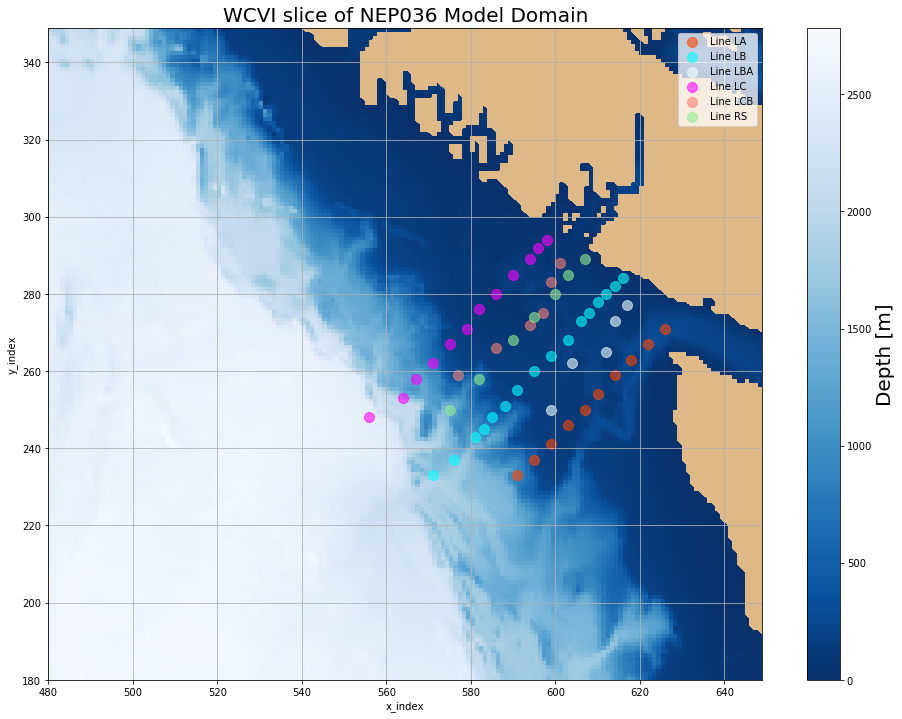

In [58]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)



lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]


cmap = plt.get_cmap('Blues_r')

cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)

y = np.empty_like(lat_stations_LA)
x = np.empty_like(lat_stations_LA)

for i in np.arange(len(lon_stations_LA)):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_stations_LA[i],lat_stations_LA[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.6, label = 'Line LA')

y = np.empty_like(lat_stations_LB)
x = np.empty_like(lat_stations_LB)

for i in np.arange(len(lon_stations_LB)):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_stations_LB[i],lat_stations_LB[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
ax.scatter(x[:], y[:], c='cyan', s=100, alpha=0.6, label = 'Line LB')

y = np.empty_like(lat_stations_LBA)
x = np.empty_like(lat_stations_LBA)

for i in np.arange(len(lon_stations_LBA)):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_stations_LBA[i],lat_stations_LBA[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
ax.scatter(x[:], y[:], c='azure', s=100, alpha=0.6, label = 'Line LBA')

y = np.empty_like(lat_stations_LC)
x = np.empty_like(lat_stations_LC)

for i in np.arange(len(lon_stations_LC)):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_stations_LC[i],lat_stations_LC[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
ax.scatter(x[:], y[:], c='magenta', s=100, alpha=0.6, label = 'Line LC')

y = np.empty_like(lat_stations_LCB)
x = np.empty_like(lat_stations_LCB)

for i in np.arange(len(lon_stations_LCB)):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_stations_LCB[i],lat_stations_LCB[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
ax.scatter(x[:], y[:], c='salmon', s=100, alpha=0.6, label = 'Line LCB')

y = np.empty_like(lat_stations_RS)
x = np.empty_like(lat_stations_RS)

for i in np.arange(len(lon_stations_RS)):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_stations_RS[i],lat_stations_RS[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
ax.scatter(x[:], y[:], c='lightgreen', s=100, alpha=0.6, label = 'Line RS')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75)
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()


In [11]:
LA_04_data = pd.read_table('/data/ssahu/IOS_data/Line_LA/2015-07-23_time_21-13-31_LA04.csv',delim_whitespace=1,header = None, skiprows=7)#, names=['Pressure', 'Temperature', 'Salinity'])

LA_04_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LA_04_data = LA_04_data.drop('Fluorescence',axis =1)
LA_04_data = LA_04_data.drop('O2 (dissolved)', axis=1)
LA_04_data = LA_04_data.drop('O2(dissolved SBE)', axis=1)
LA_04_data = LA_04_data.drop('PH', axis=1)
LA_04_data = LA_04_data.drop('No. of Bin Records', axis=1)

LA_04_data.tail(10)

,Pressure,Temperature,Salinity
172,176.0,6.876,33.8440
173,177.0,6.874,33.8447
174,178.0,6.872,33.8452
175,179.0,6.872,33.8462
176,180.0,6.873,33.8467
177,181.0,6.874,33.8471
178,182.0,6.875,33.8477
179,183.0,6.877,33.8487
180,184.0,6.879,33.8494
181,185.0,6.880,33.8499


In [33]:
def find_spice_density(df,line):
    
    if line == 'LA':
        lat = np.mean(lat_stations_LA)
        lon = np.mean(lon_stations_LA)
        
    if line == 'LB':
        lat = np.mean(lat_stations_LB)
        lon = np.mean(lon_stations_LB)
        
    if line == 'LC':
        lat = np.mean(lat_stations_LC)
        lon = np.mean(lon_stations_LC)
        
    if line == 'LBA':
        lat = np.mean(lat_stations_LBA)  
        lon = np.mean(lon_stations_LBA)
        
    if line == 'LCB':
        lat = np.mean(lat_stations_LCB)
        lon = np.mean(lon_stations_LCB)
        
    if line == 'RS':
        lat = np.mean(lat_stations_RS)
        lon = np.mean(lon_stations_RS)
        
    import gsw
        
    pressure = df.as_matrix(columns=['Pressure'])
    SP = df.as_matrix(columns= ['Salinity'])
    PT = df.as_matrix(columns = ['Temperature'])
    
    
    z  = gsw.z_from_p(-pressure, lat)
    
    SA = gsw.SA_from_SP(SP, pressure, lon, lat)
    
    CT = gsw.CT_from_pt(SP, PT)
    
    spic = gsw.spiciness0(SA, CT)
    
    rho = gsw.density.rho(SA, CT, 0)
    
    z = np.reshape(a=z,newshape=np.max(z.shape))
    spic = np.reshape(a=spic,newshape=np.max(spic.shape))
    rho = np.reshape(a=rho,newshape=np.max(rho.shape)) -1000
    
    
    df['Depth'] = pd.Series(data = z, index=df.index)
    
    df['Spice'] = pd.Series(data= spic, index = df.index)
    
    df['Density'] = pd.Series(data= rho, index = df.index)
    
    return df
    

In [34]:
LA_04_data = find_spice_density(LA_04_data, line = 'LA')

In [45]:
LA_04_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
172,176.0,6.876,33.8440,174.594267,-0.086476,26.530536
173,177.0,6.874,33.8447,175.586708,-0.086245,26.531380
174,178.0,6.872,33.8452,176.579153,-0.086158,26.532066
175,179.0,6.872,33.8462,177.571604,-0.085418,26.532876
176,180.0,6.873,33.8467,178.564059,-0.084892,26.533157
177,181.0,6.874,33.8471,179.556519,-0.084438,26.533360
178,182.0,6.875,33.8477,180.548984,-0.083840,26.533720
179,183.0,6.877,33.8487,181.541453,-0.082809,26.534260
180,184.0,6.879,33.8494,182.533928,-0.081993,26.534563
181,185.0,6.880,33.8499,183.526407,-0.081467,26.534845


In [15]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]

In [16]:
print(np.min(lon_model[y_wcvi_slice,x_wcvi_slice]), np.max(lon_model[y_wcvi_slice,x_wcvi_slice]))

-128.828 -123.987


In [17]:
print(np.min(lat_model[y_wcvi_slice,x_wcvi_slice]), np.max(lat_model[y_wcvi_slice,x_wcvi_slice]))

47.3569 49.5176


In [16]:


loc = np.where(LINE_LA_stations == 'LAO1')

In [17]:
lon_stations_LA[int(loc[0])]

-124.7275

In [18]:
def find_NEP36_model_point(line, station_number):
    if line == 'LA':
        loc = np.where(LINE_LA_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LA[int(loc[0])],lat_stations_LA[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

    if line == 'LB':
        loc = np.where(LINE_LB_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LB[int(loc[0])],lat_stations_LB[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LC':
        loc = np.where(LINE_LC_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LC[int(loc[0])],lat_stations_LC[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LBA':
        loc = np.where(LINE_LBA_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LBA[int(loc[0])],lat_stations_LBA[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LCB':
        loc = np.where(LINE_LCB_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LCB[int(loc[0])],lat_stations_LCB[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'RS':
        loc = np.where(LINE_RS_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_RS[int(loc[0])],lat_stations_RS[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    return j,i
        
    

In [19]:
NEP_aug = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_T_S_Spice_aug_larger_offshore_rho_correct.nc')


sal_aug = NEP_aug.variables['vosaline']
temp_aug = NEP_aug.variables['votemper']
spic_aug = NEP_aug.variables['spiciness']
rho_aug = NEP_aug.variables['density']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


NEP_jul = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_T_S_Spice_july_larger_offshore_rho_correct.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']



In [20]:
zlevels[:32]

array([  4.94025379e-01,   1.54137540e+00,   2.64566851e+00,
         3.81949472e+00,   5.07822371e+00,   6.44061422e+00,
         7.92956018e+00,   9.57299709e+00,   1.14050026e+01,
         1.34671383e+01,   1.58100729e+01,   1.84955597e+01,
         2.15988159e+01,   2.52114086e+01,   2.94447289e+01,
         3.44341545e+01,   4.03440514e+01,   4.73736877e+01,
         5.57642899e+01,   6.58072739e+01,   7.78538513e+01,
         9.23260727e+01,   1.09729279e+02,   1.30665985e+02,
         1.55850723e+02,   1.86125565e+02,   2.22475174e+02,
         2.66040253e+02,   3.18127441e+02,   3.80213013e+02,
         4.53937744e+02,   5.41088928e+02], dtype=float32)

In [37]:
j,i = find_NEP36_model_point('LA', 'LAO4')

print(j,i)

259 614


In [38]:
LA_06_data = pd.read_table('/data/ssahu/IOS_data/Line_LA/LA06_1Aug.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LA_06_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LA_06_data = LA_06_data.drop('Fluorescence',axis =1)
LA_06_data = LA_06_data.drop('O2 (dissolved)', axis=1)
LA_06_data = LA_06_data.drop('O2(dissolved SBE)', axis=1)
LA_06_data = LA_06_data.drop('PH', axis=1)
LA_06_data = LA_06_data.drop('No. of Bin Records', axis=1)

LA_06_data.tail(10)

,Pressure,Temperature,Salinity
96,100.0,7.314,33.7905
97,101.0,7.311,33.7922
98,102.0,7.306,33.7938
99,103.0,7.302,33.7953
100,104.0,7.290,33.8004
101,105.0,7.284,33.8029
102,106.0,7.281,33.8039
103,107.0,7.280,33.8041
104,108.0,7.280,33.8042
105,109.0,7.280,33.8043


In [39]:
LA_06_data = find_spice_density(LA_06_data, line = 'LA')

In [40]:
LA_06_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
96,100.0,7.314,33.7905,99.182936,-0.061334,26.426683
97,101.0,7.311,33.7922,100.175009,-0.060539,26.428467
98,102.0,7.306,33.7938,101.167087,-0.060120,26.430447
99,103.0,7.302,33.7953,102.159170,-0.059622,26.432208
100,104.0,7.290,33.8004,103.151257,-0.057738,26.437919
101,105.0,7.284,33.8029,104.143350,-0.056820,26.440745
102,106.0,7.281,33.8039,105.135447,-0.056531,26.441973
103,107.0,7.280,33.8041,106.127549,-0.056516,26.442293
104,108.0,7.280,33.8042,107.119656,-0.056423,26.442395
105,109.0,7.280,33.8043,108.111768,-0.056330,26.442497


In [41]:
x1,y1 = find_NEP36_model_point('LA', 'LAO6')

print(x1, y1)

250 607


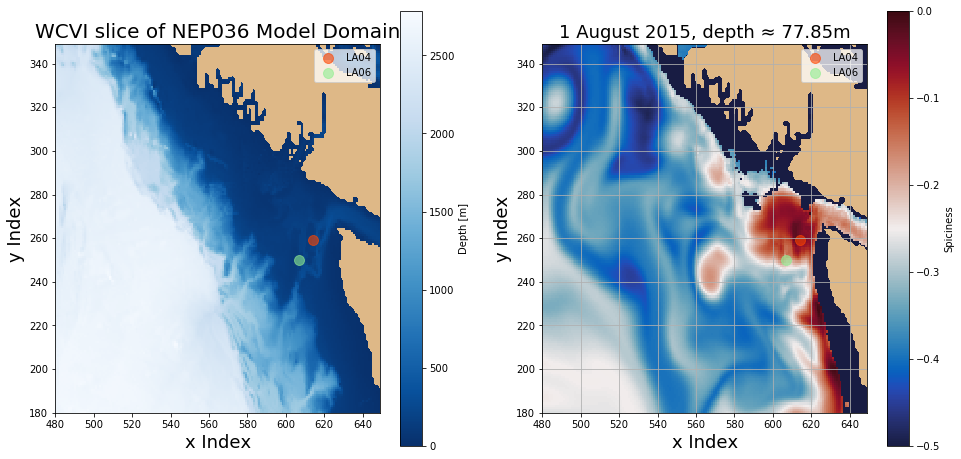

In [56]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(i,j, c='orangered', s=100, alpha=0.6, label = 'LA04')
ax1.scatter(y1, x1, c='lightgreen', s=100, alpha=0.6, label = 'LA06')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.75)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(i,j, c='orangered', s=100, alpha=0.6, label = 'LA04')
ax2.scatter(y1, x1, c='lightgreen', s=100, alpha=0.6, label = 'LA06')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.75)

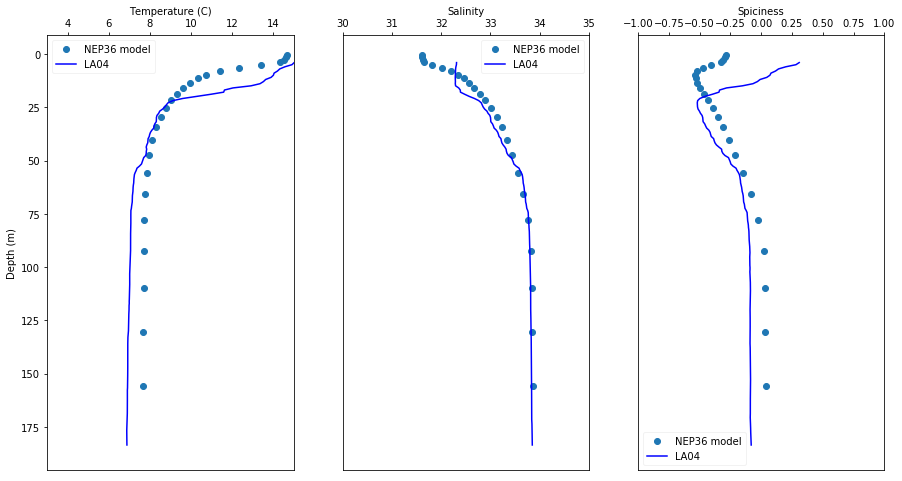

In [43]:
# Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 22



LA_04_array = LA_04_data.as_matrix()

z_data = LA_04_array[:,3]

tem_data = LA_04_array[:,1]

sal_data = LA_04_array[:,2]

spic_data = LA_04_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:26,j,i],zlevels[:26],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LA04')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:26,j,i],zlevels[:26],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LA04')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:26,j,i],zlevels[:26],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LA04')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

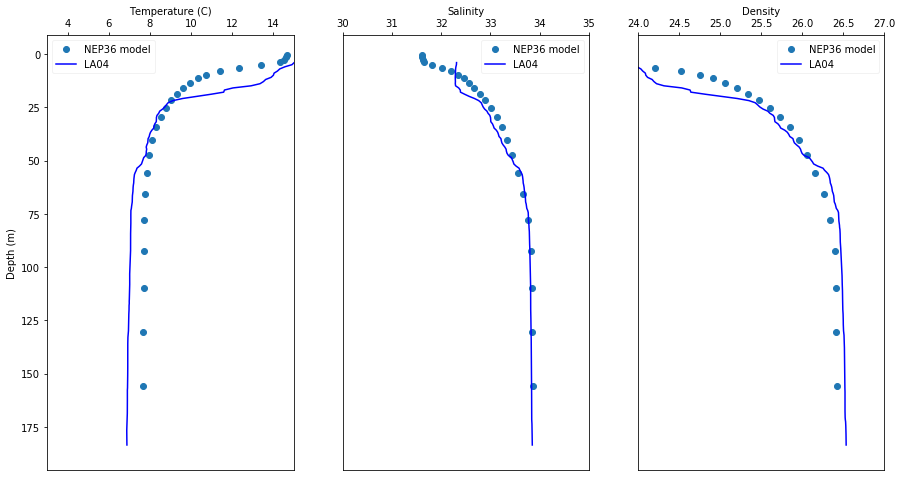

In [52]:
# Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 22



LA_04_array = LA_04_data.as_matrix()

z_data = LA_04_array[:,3]

tem_data = LA_04_array[:,1]

sal_data = LA_04_array[:,2]

spic_data = LA_04_array[:,4]

rho_data = LA_04_array[:,5]

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:26,j,i],zlevels[:26],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LA04')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:26,j,i],zlevels[:26],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LA04')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(rho_aug[t_aug,:26,j,i] -1000,zlevels[:26],'o',label = 'NEP36 model')
ax4.plot(rho_data,z_data,'b',label='LA04')
ax4.set_xlabel('Density')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(24,27)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

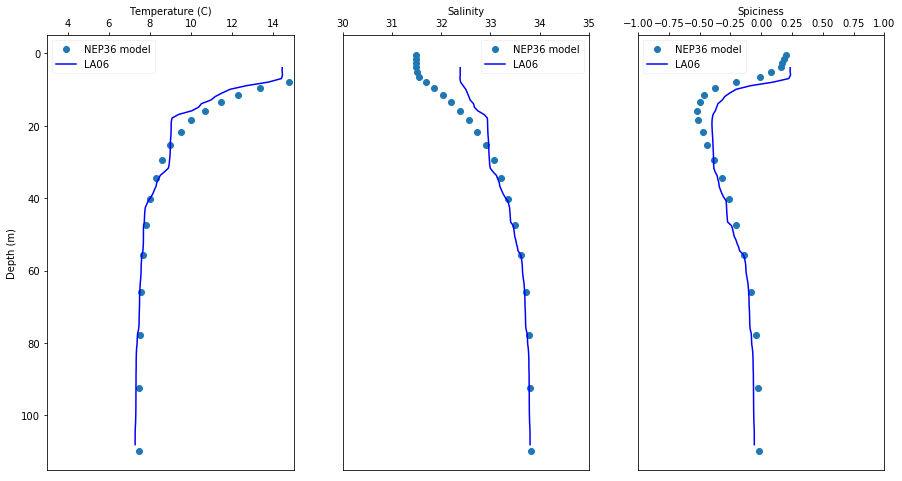

In [53]:



t_aug = 1
# (j,i) = (x1,y1) 



LA_06_array = LA_06_data.as_matrix()

z_data = LA_06_array[:,3]

tem_data = LA_06_array[:,1]

sal_data = LA_06_array[:,2]

spic_data = LA_06_array[:,4]

rho_data = LA_06_array[:,5]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:23,j,i],zlevels[:23],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:23,j,i],zlevels[:23],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:23,j,i],zlevels[:23],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LA06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

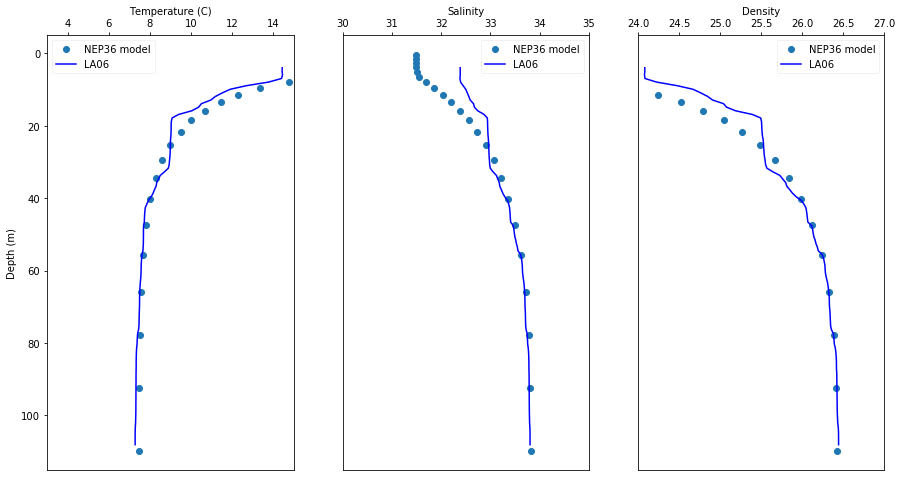

In [54]:
# Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 1
# (j,i) = (x1,y1) 



LA_06_array = LA_06_data.as_matrix()

z_data = LA_06_array[:,3]

tem_data = LA_06_array[:,1]

sal_data = LA_06_array[:,2]

spic_data = LA_06_array[:,4]

rho_data = LA_06_array[:,5]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:23,j,i],zlevels[:23],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LA06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:23,j,i],zlevels[:23],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LA06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(rho_aug[t_aug,:23,j,i] - 1000,zlevels[:23],'o',label = 'NEP36 model')
ax4.plot(rho_data,z_data,'b',label='LA06')
ax4.set_xlabel('Density')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(24,27)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

NameError: name 'y2' is not defined

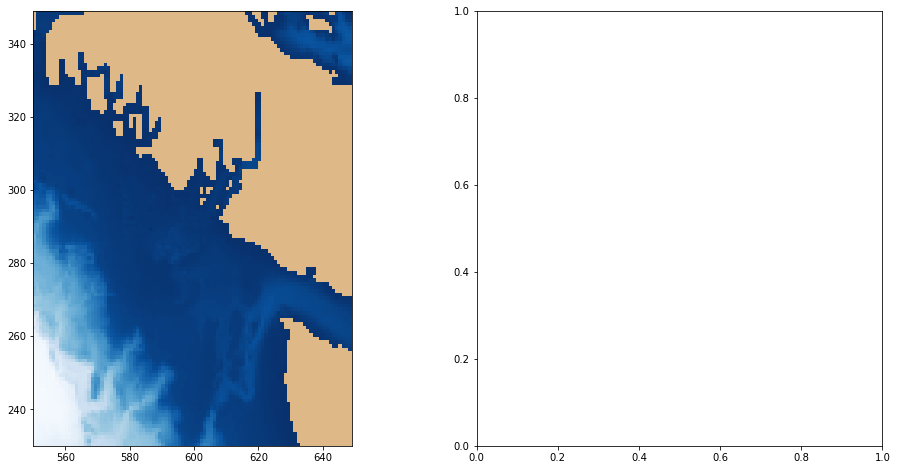

In [59]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 19
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(y2,x2, c='orangered', s=100, alpha=0.6, label = 'LB01')
ax1.scatter(y3, x3, c='lightgreen', s=100, alpha=0.6, label = 'LB02')
ax1.scatter(y4, x4, c='turquoise', s=100, alpha=0.6, label = 'LB04')
ax1.scatter(y6, x6, c='purple', s=100, alpha=0.6, label = 'LB06')
ax1.scatter(y8, x8, c='cyan', s=100, alpha=0.6, label = 'LB08')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.75)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(y2,x2, c='orangered', s=100, alpha=0.6, label = 'LB01')
ax2.scatter(y3, x3, c='lightgreen', s=100, alpha=0.6, label = 'LB02')
ax2.scatter(y4, x4, c='turquoise', s=100, alpha=0.6, label = 'LB04')
ax2.scatter(y6, x6, c='purple', s=100, alpha=0.6, label = 'LB06')
ax2.scatter(y8, x8, c='cyan', s=100, alpha=0.6, label = 'LB08')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.75)

In [60]:
LB_01_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB01_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_01_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_01_data = LB_01_data.drop('Fluorescence',axis =1)
LB_01_data = LB_01_data.drop('O2 (dissolved)', axis=1)
LB_01_data = LB_01_data.drop('O2(dissolved SBE)', axis=1)
LB_01_data = LB_01_data.drop('Transmissivity', axis=1)
LB_01_data = LB_01_data.drop('PAR', axis=1)
LB_01_data = LB_01_data.drop('No. of Bin Records', axis=1)

LB_01_data = find_spice_density(LB_01_data, line = 'LB')

LB_01_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
22,25.0,10.0594,32.2060,24.790889,-0.759618,24.765337
23,26.0,10.0658,32.2097,25.782588,-0.755830,24.767138
24,27.0,10.0654,32.2100,26.774291,-0.755706,24.767413
25,28.0,10.0665,32.2106,27.765999,-0.755101,24.767674
26,29.0,10.0709,32.2129,28.757711,-0.752680,24.768714
27,30.0,10.0748,32.2152,29.749429,-0.750348,24.769836
28,31.0,10.0755,32.2162,30.741151,-0.749501,24.770497
29,32.0,10.0768,32.2173,31.732878,-0.748476,24.771137
30,33.0,10.0742,32.2234,32.724610,-0.744504,24.776323
31,34.0,10.0366,32.2403,33.716347,-0.738831,24.795724


In [61]:
x2,y2 = find_NEP36_model_point('LB', 'LBO1')

print(x2, y2)

284 616


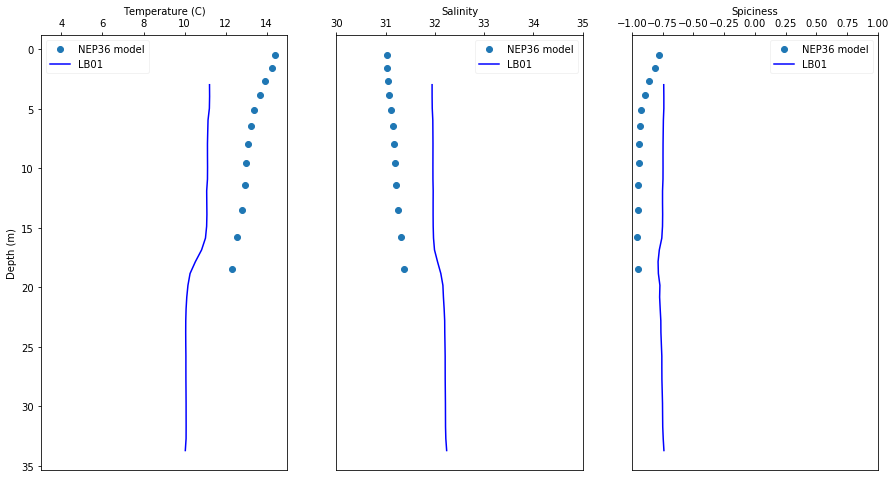

In [62]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 19
(j,i) = (x2,y2)


LB_01_array = LB_01_data.as_matrix()

z_data = LB_01_array[:,3]

tem_data = LB_01_array[:,1]

sal_data = LB_01_array[:,2]

spic_data = LB_01_array[:,4]

rho_data = LB_01_array[:,5]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:15,j,i],zlevels[:15],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB01')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB01')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB01')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

In [63]:
LB_02_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB02_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_02_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_02_data = LB_02_data.drop('Fluorescence',axis =1)
LB_02_data = LB_02_data.drop('O2 (dissolved)', axis=1)
LB_02_data = LB_02_data.drop('O2(dissolved SBE)', axis=1)
LB_02_data = LB_02_data.drop('Transmissivity', axis=1)
LB_02_data = LB_02_data.drop('PAR', axis=1)
LB_02_data = LB_02_data.drop('No. of Bin Records', axis=1)

LB_02_data = find_spice_density(LB_02_data, line = 'LB')

LB_02_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
40,43.0,9.7651,32.3599,42.642195,-0.699290,24.933583
41,44.0,9.7452,32.3679,43.633980,-0.696920,24.943069
42,45.0,9.7407,32.3699,44.625770,-0.696243,24.945366
43,46.0,9.7402,32.3702,45.617564,-0.696108,24.945685
44,47.0,9.7398,32.3706,46.609364,-0.695883,24.946066
45,48.0,9.7395,32.3711,47.601168,-0.695569,24.946509
46,49.0,9.7396,32.3711,48.592977,-0.695548,24.946496
47,50.0,9.7390,32.3715,49.584791,-0.695358,24.946910
48,51.0,9.7367,32.3738,50.576610,-0.694071,24.949096
49,52.0,9.7339,32.3751,51.568433,-0.693595,24.950582


In [64]:
x3,y3 = find_NEP36_model_point('LB', 'LBO2')

print(x3, y3)


282 614


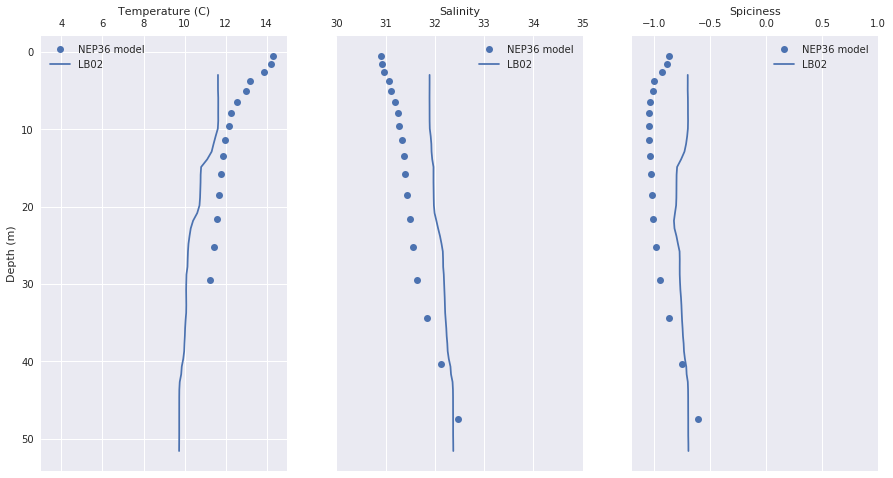

In [92]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 19
(j,i) = (x3,y3)


LB_02_array = LB_02_data.as_matrix()

z_data = LB_02_array[:,3]

tem_data = LB_02_array[:,1]

sal_data = LB_02_array[:,2]

spic_data = LB_02_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:15,j,i],zlevels[:15],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB02')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB02')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB02')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-13.057312639881864, -0.025896681024690671)

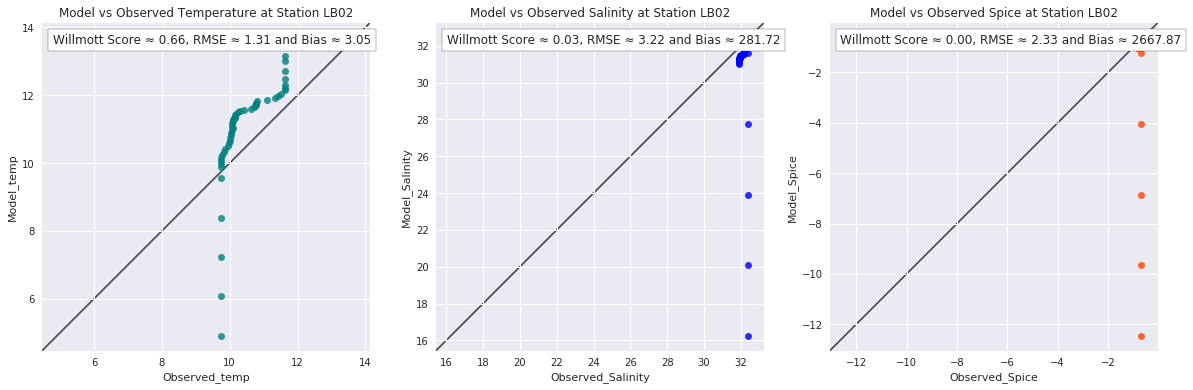

In [93]:
t_aug = 19
(j,i) = (x3,y3)
Station = 'LB02'


LB_02_array = LB_02_data.as_matrix()

z_data = LB_02_array[:,3]

tem_data = LB_02_array[:,1]

sal_data = LB_02_array[:,2]

spic_data = LB_02_array[:,4]






obs_temp = tem_data
model_temp = temp_aug[t_aug,:,j,i]

obs_sal = sal_data
model_sal = sal_aug[t_aug,:,j,i]

obs_spice = spic_data
model_spice = spic_aug[t_aug,:,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [94]:
LB_04_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB04_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_04_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_04_data = LB_04_data.drop('Fluorescence',axis =1)
LB_04_data = LB_04_data.drop('O2 (dissolved)', axis=1)
LB_04_data = LB_04_data.drop('O2(dissolved SBE)', axis=1)
LB_04_data = LB_04_data.drop('Transmissivity', axis=1)
LB_04_data = LB_04_data.drop('PAR', axis=1)
LB_04_data = LB_04_data.drop('No. of Bin Records', axis=1)

LB_04_data = find_spice_density(LB_04_data, line = 'LB')

LB_04_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
93,95.0,7.7457,33.4852,94.221412,-0.215450
94,96.0,7.7189,33.5017,95.213448,-0.207674
95,97.0,7.7060,33.5104,96.205489,-0.203370
96,98.0,7.6947,33.5183,97.197534,-0.199395
97,99.0,7.6802,33.5287,98.189585,-0.194110
98,100.0,7.6599,33.5434,99.181640,-0.186617
99,101.0,7.6148,33.5756,100.173700,-0.170321
100,102.0,7.5942,33.5890,101.165765,-0.163804
101,103.0,7.5837,33.5947,102.157835,-0.161286
102,104.0,7.5772,33.5988,103.149909,-0.159306


In [65]:
x4,y4 = find_NEP36_model_point('LB', 'LBO4')

print(x4, y4)


278 610


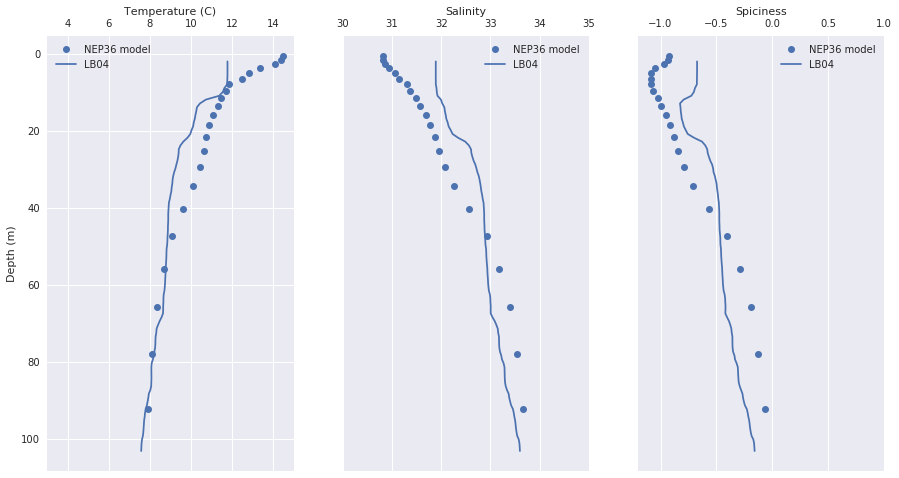

In [96]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 19
(j,i) = (x4,y4)


LB_04_array = LB_04_data.as_matrix()

z_data = LB_04_array[:,3]

tem_data = LB_04_array[:,1]

sal_data = LB_04_array[:,2]

spic_data = LB_04_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:22,j,i],zlevels[:22],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB04')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB04')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB04')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-1.1400750916836235, -0.010485214266096117)

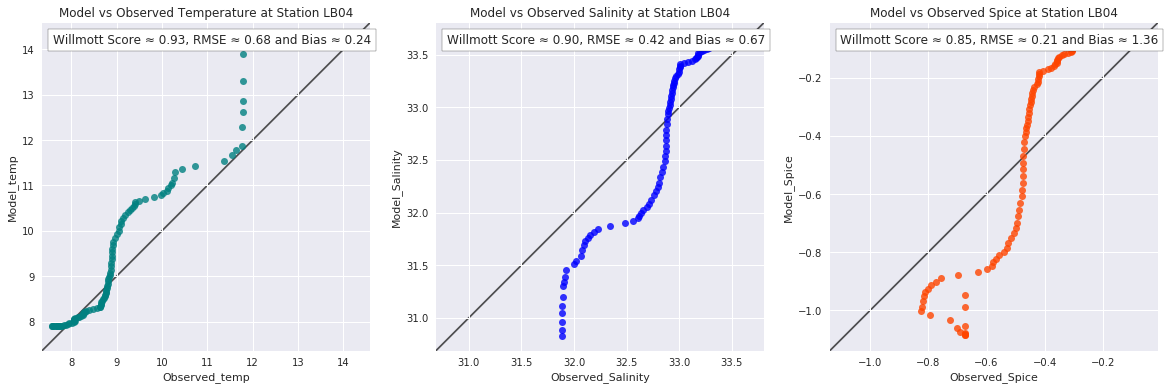

In [97]:
Station = 'LB04'
t_aug = 19
(j,i) = (x4,y4)


LB_04_array = LB_04_data.as_matrix()

z_data = LB_04_array[:,3]

tem_data = LB_04_array[:,1]

sal_data = LB_04_array[:,2]

spic_data = LB_04_array[:,4]




obs_temp = tem_data
model_temp = temp_aug[t_aug,:,j,i]

obs_sal = sal_data
model_sal = sal_aug[t_aug,:,j,i]

obs_spice = spic_data
model_spice = spic_aug[t_aug,:,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [66]:
LB_06_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB06_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_06_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_06_data = LB_06_data.drop('Fluorescence',axis =1)
LB_06_data = LB_06_data.drop('O2 (dissolved)', axis=1)
LB_06_data = LB_06_data.drop('O2(dissolved SBE)', axis=1)
LB_06_data = LB_06_data.drop('Transmissivity', axis=1)
LB_06_data = LB_06_data.drop('PAR', axis=1)
LB_06_data = LB_06_data.drop('No. of Bin Records', axis=1)

LB_06_data = find_spice_density(LB_06_data, line = 'LB')

LB_06_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
95,97.0,7.2592,33.7742,96.205489,-0.081402,26.421407
96,98.0,7.2569,33.7749,97.197534,-0.081219,26.422305
97,99.0,7.2560,33.7749,98.189585,-0.081330,26.422457
98,100.0,7.2547,33.7754,99.181640,-0.081140,26.423058
99,101.0,7.2537,33.7758,100.173700,-0.080978,26.423539
100,102.0,7.2525,33.7764,101.165765,-0.080705,26.424201
101,103.0,7.2523,33.7765,102.157835,-0.080641,26.424331
102,104.0,7.2519,33.7766,103.149909,-0.080608,26.424488
103,105.0,7.2512,33.7769,104.141989,-0.080476,26.424845
104,106.0,7.2505,33.7770,105.134073,-0.080487,26.425044


In [67]:
x6,y6 = find_NEP36_model_point('LB', 'LBO6')

print(x6, y6)


273 606


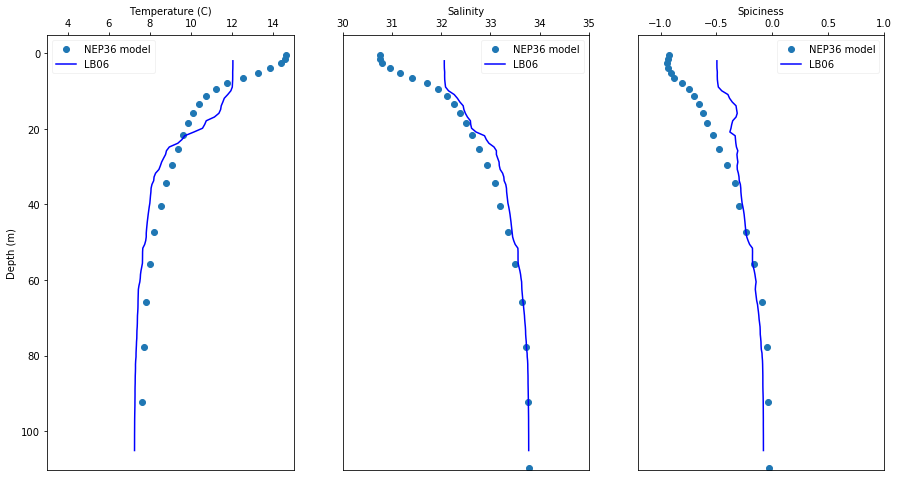

In [68]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 19
(j,i) = (x6,y6)


LB_06_array = LB_06_data.as_matrix()

z_data = LB_06_array[:,3]

tem_data = LB_06_array[:,1]

sal_data = LB_06_array[:,2]

spic_data = LB_06_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:22,j,i],zlevels[:22],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB06')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

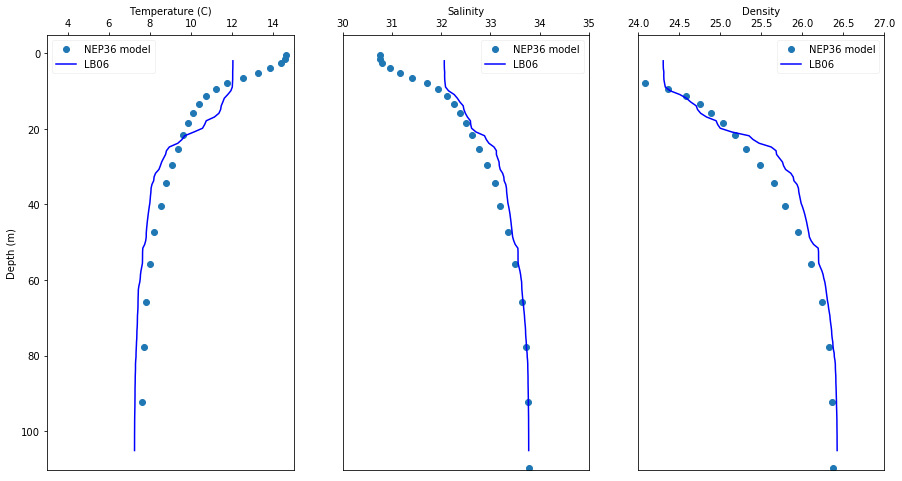

In [70]:



t_aug = 19
(j,i) = (x6,y6)


LB_06_array = LB_06_data.as_matrix()

z_data = LB_06_array[:,3]

tem_data = LB_06_array[:,1]

sal_data = LB_06_array[:,2]

spic_data = LB_06_array[:,4]

rho_data = LB_06_array[:,5]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:22,j,i],zlevels[:22],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB06')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB06')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(rho_aug[t_aug,:,j,i] - 1000,zlevels[:],'o',label = 'NEP36 model')
ax4.plot(rho_data,z_data,'b',label='LB06')
ax4.set_xlabel('Density')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(24,27)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-0.98558326824730447, 0.014513796133903412)

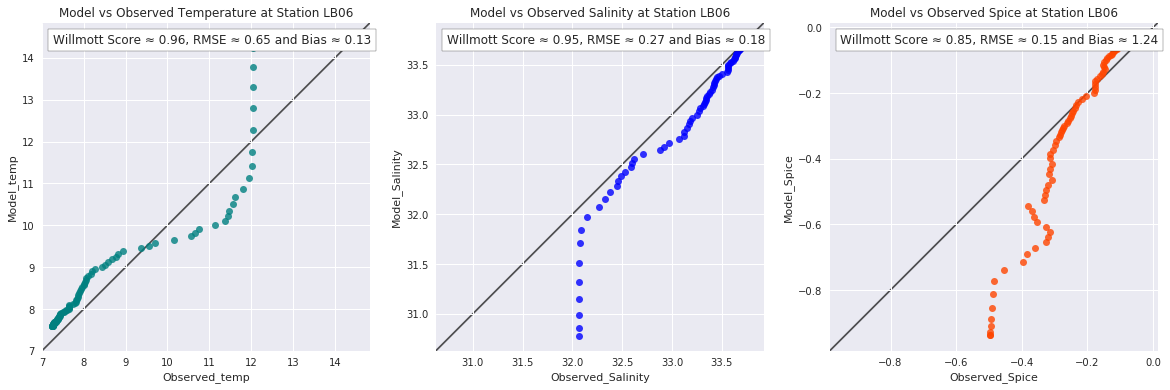

In [101]:
Station = 'LB06'

t_aug = 19
(j,i) = (x6,y6)


LB_06_array = LB_06_data.as_matrix()

z_data = LB_06_array[:,3]

tem_data = LB_06_array[:,1]

sal_data = LB_06_array[:,2]

spic_data = LB_06_array[:,4]





obs_temp = tem_data
model_temp = temp_aug[t_aug,:,j,i]

obs_sal = sal_data
model_sal = sal_aug[t_aug,:,j,i]

obs_spice = spic_data
model_spice = spic_aug[t_aug,:,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [71]:
LB_08_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB08_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_08_data = LB_08_data.drop('Fluorescence',axis =1)
LB_08_data = LB_08_data.drop('O2 (dissolved)', axis=1)
LB_08_data = LB_08_data.drop('O2(dissolved SBE)', axis=1)
LB_08_data = LB_08_data.drop('Transmissivity', axis=1)
LB_08_data = LB_08_data.drop('PAR', axis=1)
LB_08_data = LB_08_data.drop('No. of Bin Records', axis=1)

LB_08_data = find_spice_density(LB_08_data, line = 'LB')

LB_08_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
115,118.0,7.2067,33.7298,117.039461,-0.120764,26.394256
116,119.0,7.2002,33.7311,118.031608,-0.120778,26.396201
117,120.0,7.1912,33.7336,119.023760,-0.120303,26.399437
118,121.0,7.1871,33.7346,120.015917,-0.120174,26.400814
119,122.0,7.1861,33.7351,121.008078,-0.119942,26.401369
120,123.0,7.1855,33.7353,122.000245,-0.119867,26.401632
121,124.0,7.1833,33.7359,122.992416,-0.119742,26.402432
122,125.0,7.1808,33.7365,123.984592,-0.119662,26.403273
123,126.0,7.1786,33.7370,124.976773,-0.119609,26.403993
124,127.0,7.1781,33.7372,125.968959,-0.119520,26.404242


In [72]:
x8,y8 = find_NEP36_model_point('LB', 'LBO8')

print(x8, y8)


264 599


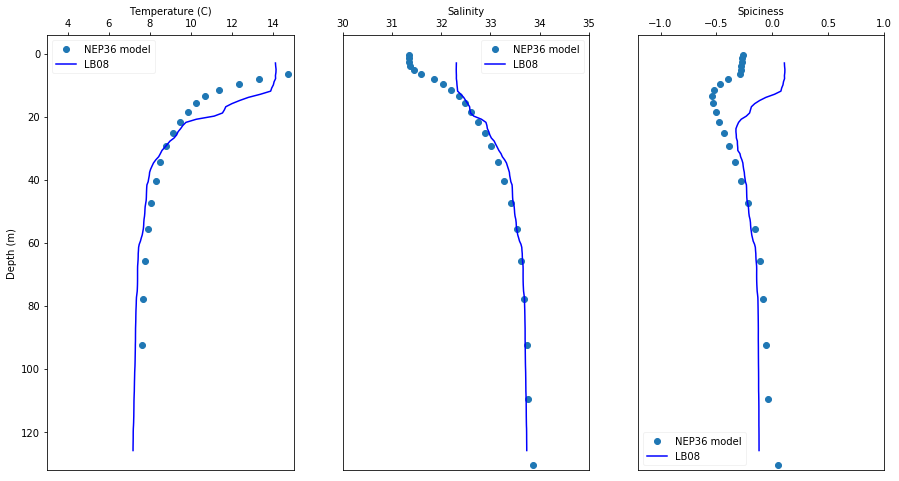

In [30]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 19
(j,i) = (x8,y8)


LB_08_array = LB_08_data.as_matrix()

z_data = LB_08_array[:,3]

tem_data = LB_08_array[:,1]

sal_data = LB_08_array[:,2]

spic_data = LB_08_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:22,j,i],zlevels[:22],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB08')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB08')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB08')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

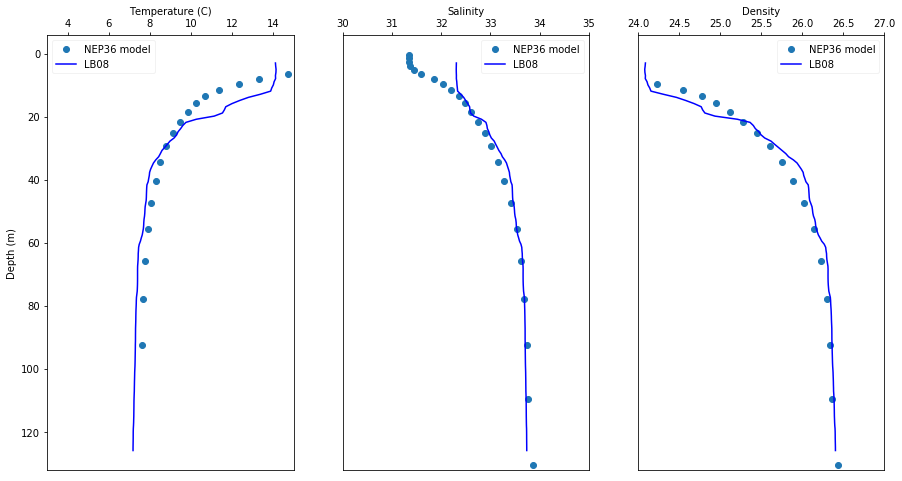

In [75]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 19
(j,i) = (x8,y8)


LB_08_array = LB_08_data.as_matrix()

z_data = LB_08_array[:,3]

tem_data = LB_08_array[:,1]

sal_data = LB_08_array[:,2]

spic_data = LB_08_array[:,4]

rho_data = LB_08_array[:,5]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:22,j,i],zlevels[:22],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB08')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB08')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(rho_aug[t_aug,:,j,i]-1000,zlevels[:],'o',label = 'NEP36 model')
ax4.plot(rho_data,z_data,'b',label='LB08')
ax4.set_xlabel('Density')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(24,27)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

In [31]:


def get_stat(obs_temp, model_temp):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



(-0.56897944321338378, 0.14489419575031637)

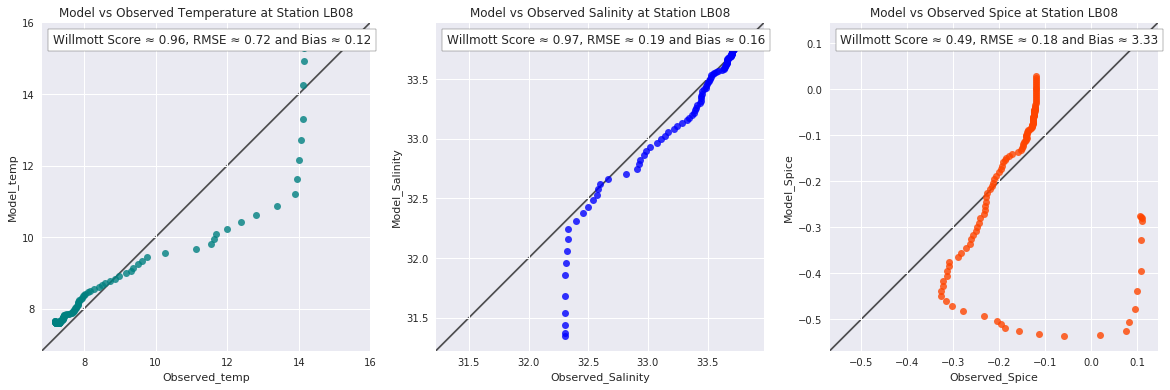

In [32]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

t_aug = 19
(j,i) = (x8,y8)
Station = 'LB08'

sns.set(color_codes=True)

LB_08_array = LB_08_data.as_matrix()

z_data = LB_08_array[:,3]

tem_data = LB_08_array[:,1]

sal_data = LB_08_array[:,2]

spic_data = LB_08_array[:,4]


obs_temp = tem_data
model_temp = temp_aug[t_aug,:,j,i]

obs_sal = sal_data
model_sal = sal_aug[t_aug,:,j,i]

obs_spice = spic_data
model_spice = spic_aug[t_aug,:,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [76]:
LB_08_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB08_23AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

# LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_08_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LB_08_data = LB_08_data.drop('Fluorescence',axis =1)
LB_08_data = LB_08_data.drop('O2 (dissolved)', axis=1)
LB_08_data = LB_08_data.drop('O2(dissolved SBE)', axis=1)
LB_08_data = LB_08_data.drop('PH', axis=1)
LB_08_data = LB_08_data.drop('No. of Bin Records', axis=1)

LB_08_data = find_spice_density(LB_08_data, line = 'LB')
LB_08_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice,Density
127,131.0,7.070,33.8206,129.937750,-0.075520,26.484857
128,132.0,7.063,33.8209,130.929960,-0.076322,26.486075
129,133.0,7.059,33.8209,131.922175,-0.076894,26.486644
130,134.0,7.058,33.8209,132.914394,-0.077022,26.486803
131,135.0,7.055,33.8208,133.906619,-0.077519,26.487157
132,136.0,7.053,33.8208,134.898848,-0.077795,26.487453
133,137.0,7.052,33.8208,135.891082,-0.077923,26.487612
134,138.0,7.050,33.8207,136.883321,-0.078271,26.487829
135,139.0,7.047,33.8209,137.875565,-0.078551,26.488419
136,140.0,7.046,33.8211,138.867813,-0.078535,26.488735


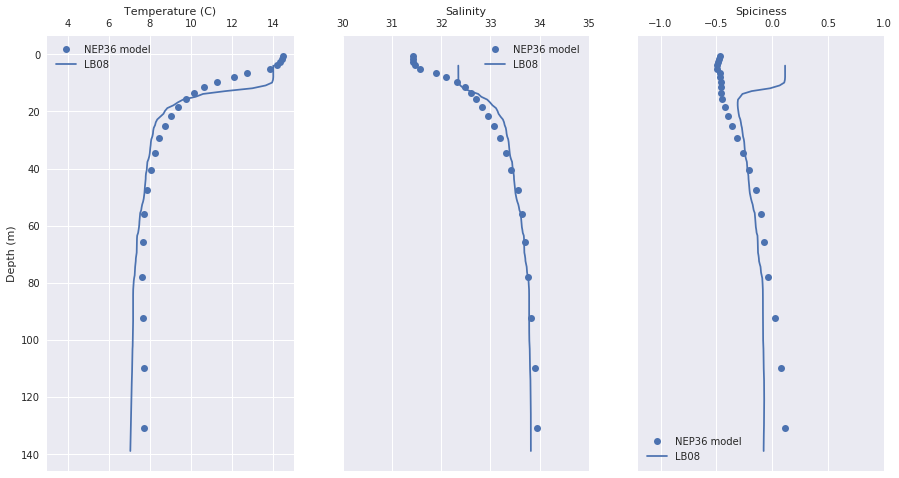

In [34]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 22
(j,i) = (x8,y8)


LB_08_array = LB_08_data.as_matrix()

z_data = LB_08_array[:,3]

tem_data = LB_08_array[:,1]

sal_data = LB_08_array[:,2]

spic_data = LB_08_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:24,j,i],zlevels[:24],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB08')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB08')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB08')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

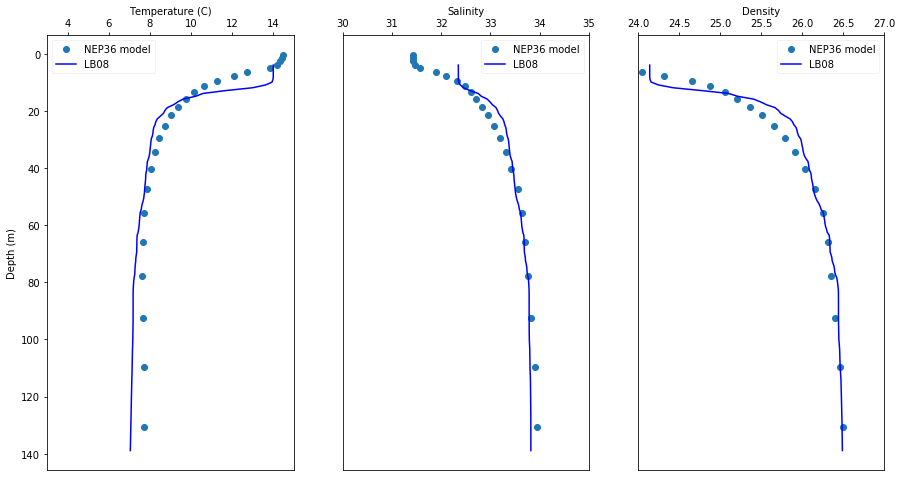

In [77]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 22
(j,i) = (x8,y8)


LB_08_array = LB_08_data.as_matrix()

z_data = LB_08_array[:,3]

tem_data = LB_08_array[:,1]

sal_data = LB_08_array[:,2]

spic_data = LB_08_array[:,4]

rho_data = LB_08_array[:,5]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:24,j,i],zlevels[:24],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB08')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB08')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(rho_aug[t_aug,:,j,i] - 1000,zlevels[:],'o',label = 'NEP36 model')
ax4.plot(rho_data,z_data,'b',label='LB08')
ax4.set_xlabel('Density')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(24,27)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-0.53009267831634233, 0.15884674971099891)

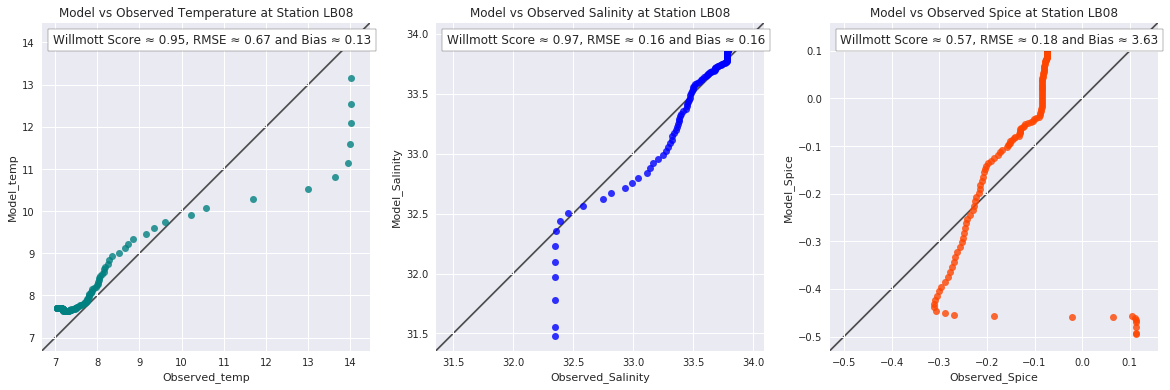

In [35]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

t_aug = 22
(j,i) = (x8,y8)
Station = 'LB08'

sns.set(color_codes=True)

LB_08_array = LB_08_data.as_matrix()

z_data = LB_08_array[:,3]

tem_data = LB_08_array[:,1]

sal_data = LB_08_array[:,2]

spic_data = LB_08_array[:,4]


obs_temp = tem_data
model_temp = temp_aug[t_aug,:24,j,i]

obs_sal = sal_data
model_sal = sal_aug[t_aug,:24,j,i]

obs_spice = spic_data
model_spice = spic_aug[t_aug,:24,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [45]:
LB_09_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB09_23JUL.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

# LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_09_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LB_09_data = LB_09_data.drop('Fluorescence',axis =1)
LB_09_data = LB_09_data.drop('O2 (dissolved)', axis=1)
LB_09_data = LB_09_data.drop('O2(dissolved SBE)', axis=1)
LB_09_data = LB_09_data.drop('PH', axis=1)
LB_09_data = LB_09_data.drop('No. of Bin Records', axis=1)

LB_09_data = find_spice_density(LB_09_data, line = 'LB')
LB_09_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
129,133.0,6.868,33.8796,131.922175,-0.062799
130,134.0,6.868,33.8798,132.914394,-0.062635
131,135.0,6.869,33.8799,133.906619,-0.062397
132,136.0,6.869,33.8799,134.898848,-0.062377
133,137.0,6.869,33.8797,135.891082,-0.062501
134,138.0,6.869,33.8798,136.883321,-0.062409
135,139.0,6.870,33.8797,137.875565,-0.062314
136,140.0,6.870,33.8797,138.867813,-0.062294
137,141.0,6.870,33.8797,139.860067,-0.062274
138,142.0,6.870,33.8797,140.852325,-0.062254


In [46]:
x9,y9 = find_NEP36_model_point('LB', 'LBO9')

print(x9, y9)


260 595


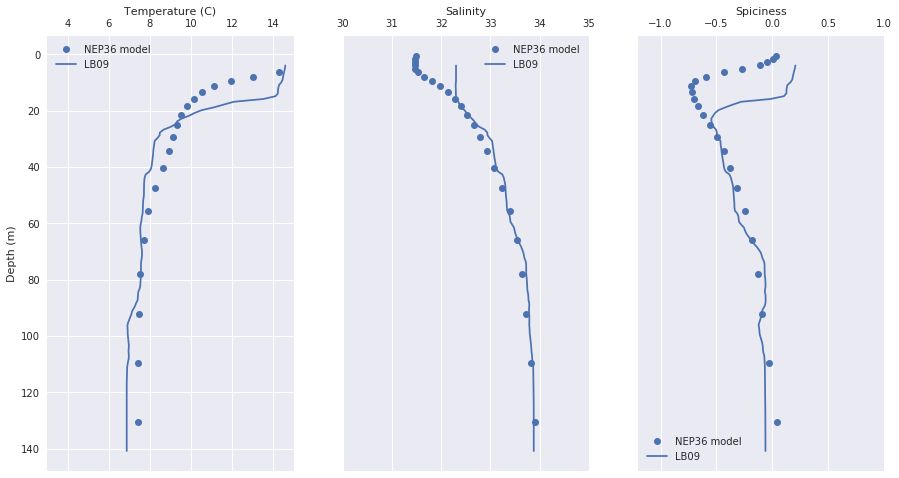

In [47]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_jul = 22
(j,i) = (x9,y9)


LB_09_array = LB_09_data.as_matrix()

z_data = LB_09_array[:,3]

tem_data = LB_09_array[:,1]

sal_data = LB_09_array[:,2]

spic_data = LB_09_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[t_jul,:24,j,i],zlevels[:24],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB09')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[t_jul,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB09')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[t_jul,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB09')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-0.76944764737489924, 0.25434844572429111)

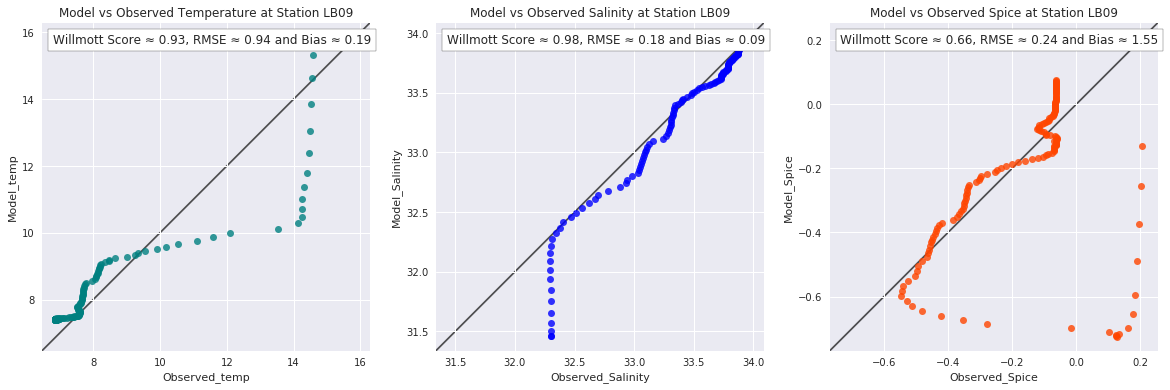

In [48]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

t_jul = 22
(j,i) = (x9,y9)
Station = 'LB09'

sns.set(color_codes=True)

LB_09_array = LB_09_data.as_matrix()

z_data = LB_09_array[:,3]

tem_data = LB_09_array[:,1]

sal_data = LB_09_array[:,2]

spic_data = LB_09_array[:,4]


obs_temp = tem_data
model_temp = temp_jul[t_jul,:24,j,i]

obs_sal = sal_data
model_sal = sal_jul[t_jul,:24,j,i]

obs_spice = spic_data
model_spice = spic_jul[t_jul,:24,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [49]:
LB_12_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB12_23AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

# LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_12_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LB_12_data = LB_12_data.drop('Fluorescence',axis =1)
LB_12_data = LB_12_data.drop('O2 (dissolved)', axis=1)
LB_12_data = LB_12_data.drop('O2(dissolved SBE)', axis=1)
LB_12_data = LB_12_data.drop('PH', axis=1)
LB_12_data = LB_12_data.drop('No. of Bin Records', axis=1)

LB_12_data = find_spice_density(LB_12_data, line = 'LB')
LB_12_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
474,479.0,5.164,34.0518,475.519796,-0.166915
475,480.0,5.160,34.0525,476.513697,-0.166910
476,481.0,5.152,34.0530,477.507604,-0.167555
477,482.0,5.128,34.0548,478.501515,-0.169301
478,483.0,5.127,34.0548,479.495432,-0.169413
479,484.0,5.085,34.0570,480.489353,-0.173140
480,485.0,5.080,34.0576,481.483279,-0.173329
481,486.0,5.067,34.0587,482.477210,-0.174169
482,487.0,5.064,34.0593,483.471146,-0.174105
483,488.0,5.058,34.0597,484.465087,-0.174561


In [61]:
x12,y12 = find_NEP36_model_point('LB', 'LB12')

print(x12, y12)


248 585


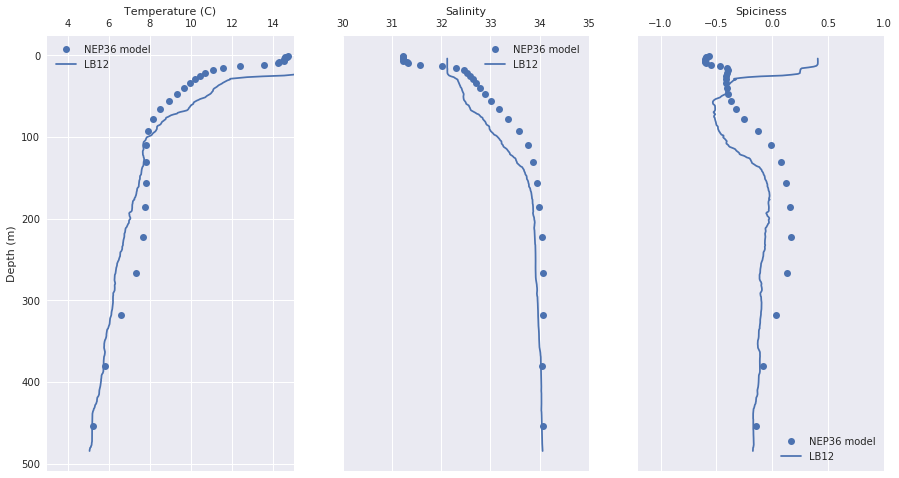

In [62]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_aug = 23
(j,i) = (x12,y12)


LB_12_array = LB_12_data.as_matrix()

z_data = LB_12_array[:,3]

tem_data = LB_12_array[:,1]

sal_data = LB_12_array[:,2]

spic_data = LB_12_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[t_aug,:31,j,i],zlevels[:31],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB12')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB12')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[t_aug,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB12')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-0.62375673942414545, 0.46481070741023178)

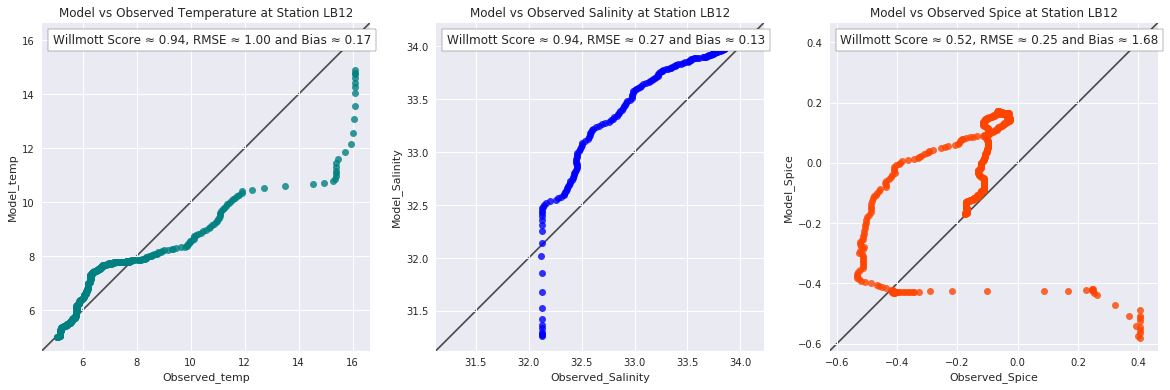

In [63]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

t_aug = 22
(j,i) = (x12,y12)
Station = 'LB12'

sns.set(color_codes=True)

LB_12_array = LB_12_data.as_matrix()

z_data = LB_12_array[:,3]

tem_data = LB_12_array[:,1]

sal_data = LB_12_array[:,2]

spic_data = LB_12_array[:,4]


obs_temp = tem_data
model_temp = temp_aug[t_aug,:31,j,i]

obs_sal = sal_data
model_sal = sal_aug[t_aug,:31,j,i]

obs_spice = spic_data
model_spice = spic_aug[t_aug,:31,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



In [64]:
LB_12_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB12_23JUL.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

# LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_12_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LB_12_data = LB_12_data.drop('Fluorescence',axis =1)
LB_12_data = LB_12_data.drop('O2 (dissolved)', axis=1)
LB_12_data = LB_12_data.drop('O2(dissolved SBE)', axis=1)
LB_12_data = LB_12_data.drop('PH', axis=1)
LB_12_data = LB_12_data.drop('No. of Bin Records', axis=1)

LB_12_data = find_spice_density(LB_12_data, line = 'LB')
LB_12_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
472,477.0,5.578,34.0254,473.532007,-0.132178
473,478.0,5.578,34.0254,474.525899,-0.132164
474,479.0,5.578,34.0254,475.519796,-0.132150
475,480.0,5.580,34.0252,476.513697,-0.132016
476,481.0,5.578,34.0254,477.507604,-0.132123
477,482.0,5.579,34.0254,478.501515,-0.131977
478,483.0,5.601,34.0232,479.495432,-0.130631
479,484.0,5.602,34.0232,480.489353,-0.130485
480,485.0,5.603,34.0231,481.483279,-0.130410
481,486.0,5.605,34.0229,482.477210,-0.130275


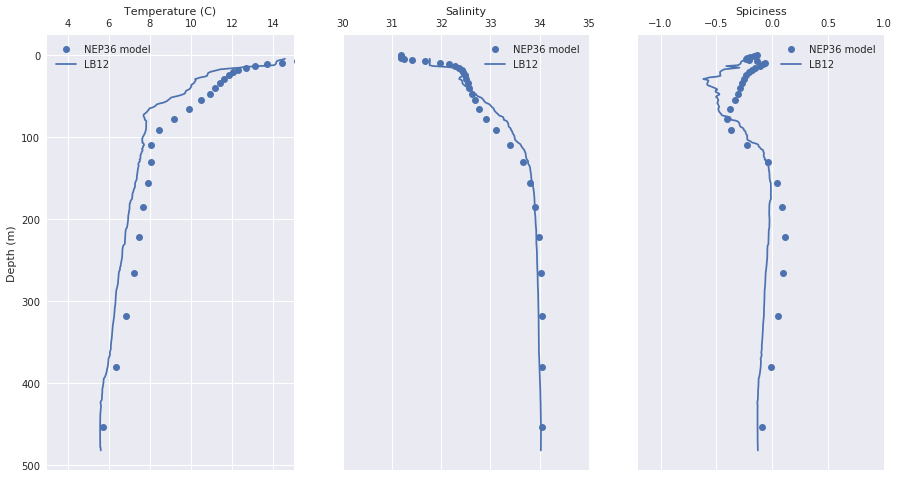

In [67]:
##### Date of sampling LA04 was UTC 2015/08/23 10:33:00.000


t_jul = 22
(j,i) = (x12,y12)


LB_12_array = LB_12_data.as_matrix()

z_data = LB_12_array[:,3]

tem_data = LB_12_array[:,1]

sal_data = LB_12_array[:,2]

spic_data = LB_12_array[:,4]



fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[t_jul,:31,j,i],zlevels[:31],'o',label = 'NEP36 model')
ax2.plot(tem_data ,z_data,'b',label='LB12')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_xlim(3,15)
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[t_jul,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax3.plot(sal_data,z_data,'b',label='LB12')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
ax3.set_xlim(30,35)
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[t_jul,:,j,i],zlevels[:],'o',label = 'NEP36 model')
ax4.plot(spic_data,z_data,'b',label='LB12')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,1)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

(-0.65973441869021987, 0.13746558355025024)

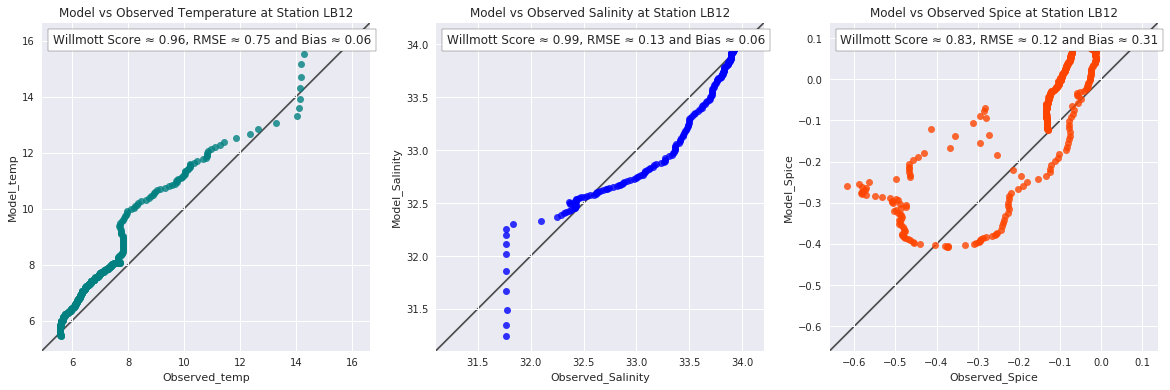

In [68]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

t_jul = 22
(j,i) = (x12,y12)
Station = 'LB12'

sns.set(color_codes=True)

LB_12_array = LB_12_data.as_matrix()

z_data = LB_12_array[:,3]

tem_data = LB_12_array[:,1]

sal_data = LB_12_array[:,2]

spic_data = LB_12_array[:,4]


obs_temp = tem_data
model_temp = temp_jul[t_jul,:31,j,i]

obs_sal = sal_data
model_sal = sal_jul[t_jul,:31,j,i]

obs_spice = spic_data
model_spice = spic_jul[t_jul,:31,j,i]



def get_stat(obs_temp, model_temp, z_data):
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_data)

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws, model_temp_interp



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




gamma2,rms_error,ws,model_temp_interp = get_stat(obs_temp, model_temp, z_data)
df =pd.DataFrame()
df['Observed_temp'] = obs_temp
df['Model_temp'] = model_temp_interp
sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
ax1.set_title('Model vs Observed Temperature at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax1.add_artist(anchored_text)
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_aspect('equal')
ax1.set_xlim(lims)
ax1.set_ylim(lims)



gamma2,rms_error,ws,model_sal_interp = get_stat(obs_sal, model_sal, z_data)
df =pd.DataFrame()
df['Observed_Salinity'] = obs_sal
df['Model_Salinity'] = model_sal_interp
sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
ax2.set_title('Model vs Observed Salinity at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax2.add_artist(anchored_text)
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_aspect('equal')
ax2.set_xlim(lims)
ax2.set_ylim(lims)


gamma2,rms_error,ws,model_spic_interp = get_stat(obs_spice, model_spice, z_data)
df =pd.DataFrame()
df['Observed_Spice'] = obs_spice
df['Model_Spice'] = model_spic_interp
sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
ax3.set_title('Model vs Observed Spice at Station {0}'.format(Station))
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
ax3.add_artist(anchored_text)
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_aspect('equal')
ax3.set_xlim(lims)
ax3.set_ylim(lims)



#### Now having extracted all the station informations and their respective data, let us bin them by depth and calculate the skil scores of each bin separately

In [80]:
LA_04_data = pd.DataFrame(LA_04_data.Temperature.str.split(' ',1).tolist(),
                                   columns = ['Temperature', 'Fluroscence'])

In [81]:
LA_04_data

,Temperature,Fluroscence
0,,15.0350 1.028 32.3114 7.13 310.7 8.480 ...
1,,14.9230 1.020 32.3090 7.18 312.9 8.486 ...
2,,14.5790 1.049 32.2985 7.23 315.2 8.491 ...
3,,14.3300 1.242 32.2922 7.24 315.5 8.494 ...
4,,14.2190 1.870 32.2916 7.19 313.4 8.487 ...
5,,14.0540 2.535 32.2891 7.09 309.2 8.484 ...
6,,14.0190 3.220 32.2877 6.97 303.9 8.479 ...
7,,13.9070 3.753 32.2856 6.86 299.2 8.468 ...
8,,13.6430 5.105 32.2874 6.52 284.1 8.456 ...
9,,13.5340 5.600 32.2883 6.10 265.9 8.446 ...


In [55]:
LA_04_data = pd.DataFrame(LA_04_data.Temperature.str.split(' ',1).tolist(),
                                   columns = ['Temperature','Salinity'])

In [28]:
data = np.array(lon_stations_LA[:], lat_stations_LA[:])

TypeError: data type not understood

In [25]:
>> pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])

'LAO1'

In [10]:
size(numbers)

NameError: name 'size' is not defined